# Interpolación de Hermite

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
x_list=[1.3,1.6,1.9]
y_list=[0.6200860,0.4554022,0.28181816]
dydx_list=[-0.5220232,-0.5698959,-0.5811571]

In [35]:
z=np.zeros(2*(len(x_list)))
for i in range(0,len(x_list)):
    z[2*i]=x_list[i]
    z[2*i+1]=x_list[i]
print(z)

[ 1.3  1.3  1.6  1.6  1.9  1.9]


In [36]:
Q=np.zeros((2*len(x_list),2*len(x_list)))
for i in range(0,len(x_list)):
    Q[2*i][0]=y_list[i]
    Q[2*i+1][0]=y_list[i]
    Q[2*i+1][1]=dydx_list[i]
    
    if i!=0:
         Q[2*i][1]=(Q[2*i-1][0]-Q[2*i][0])/(z[2*i-1]-z[2*i])
print(Q)

[[ 0.620086    0.          0.          0.          0.          0.        ]
 [ 0.620086   -0.5220232   0.          0.          0.          0.        ]
 [ 0.4554022  -0.548946    0.          0.          0.          0.        ]
 [ 0.4554022  -0.5698959   0.          0.          0.          0.        ]
 [ 0.28181816 -0.57861347  0.          0.          0.          0.        ]
 [ 0.28181816 -0.5811571   0.          0.          0.          0.        ]]


In [37]:
for i in range(2,len(z)):
    for j in range(2,i+1):
        Q[i][j]=(Q[i][j-1]-Q[i-1][j-1])/(z[i]-z[i-j])
print(Q)

[[ 0.620086    0.          0.          0.          0.          0.        ]
 [ 0.620086   -0.5220232   0.          0.          0.          0.        ]
 [ 0.4554022  -0.548946   -0.08974267  0.          0.          0.        ]
 [ 0.4554022  -0.5698959  -0.069833    0.06636556  0.          0.        ]
 [ 0.28181816 -0.57861347 -0.02905856  0.06795741  0.00265309  0.        ]
 [ 0.28181816 -0.5811571  -0.00847878  0.06859926  0.00106975 -0.00263889]]


In [ ]:
def Hermite(,,x):
    sum=0
    for i in range(1,len(x_list)):
        prod=1
        for j in range(0,i):
                prod=prod*(x-x_list[j])
        sum=sum+f[i][i]*prod
    return sum
                
print(f)

# Versión 2

In [155]:
import numpy as np
import matplotlib.pyplot as plt

In [156]:
x_list = [1.3,1.6,1.9]
y_list = [0.6200860,0.4554022,0.2818186]
dydx_list = [-0.5220232,-0.5698959,-0.5811571]

In [157]:
"""
def DiferenciaDividida(x_list,y_list,dydx_list):

    
    s = len(x_list)
    T = np.zeros((2*s,2*s))
    
    Z = np.zeros(2*s)
    
    for i in range(0,len(Z)):
        Z[i] = x_list[int(i/2)]  #Procedimiento llamado casting
    
    for i in range(0,2*s):
        for j in range(0,2*s):
            if i == j:
                T[i][j]= y_list[int(i/2)] 


    #Diagonales no principales
    for k in range(1,2*s):
        for i in range(0,2*s-1):  
            for j in range(1,2*s):
                
                if j != i and j == i + k and Z[j] != Z[i]:
                    T[i][j] = (T[i+1][j] - T[i][j-1]) / (Z[j] - Z[i])
                    
                elif j != i and j == i + k and Z[j] == Z[i]:
                    T[i][j] = dydx_list[int(i/2)]
                    
    return T
"""

s = len(x_list)
T = np.zeros((2*s,2*s))
  
Z = np.zeros(2*s)
    
for i in range(0,len(Z)):
    Z[i] = x_list[int(i/2)]  #Procedimiento llamado casting
    
for i in range(0,2*s):
    for j in range(0,2*s):
        if i == j:
            T[i][j]= y_list[int(i/2)] 


#Diagonales no principales
for k in range(1,2*s):
    for i in range(0,2*s-1):  
        for j in range(1,2*s):
                
            if j != i and j == i + k and Z[j] != Z[i]:
                T[i][j] = (T[i+1][j] - T[i][j-1]) / (Z[j] - Z[i])
                    
            elif j != i and j == i + k and Z[j] == Z[i]:
                T[i][j] = dydx_list[int(i/2)]



In [158]:
np.set_printoptions(precision=7)
print(T)

[[ 0.620086  -0.5220232 -0.0897427  0.0663656  0.0026667 -0.0027747]
 [ 0.         0.620086  -0.548946  -0.069833   0.0679656  0.0010019]
 [ 0.         0.         0.4554022 -0.5698959 -0.0290537  0.0685667]
 [ 0.         0.         0.         0.4554022 -0.578612  -0.0084837]
 [ 0.         0.         0.         0.         0.2818186 -0.5811571]
 [ 0.         0.         0.         0.         0.         0.2818186]]


In [159]:
def Hermite(x_list,y_list,x,T):
    sum = 0
    for i in range(1,2*s):
        prod = 1.0
        for j in range(0,i):
            prod = prod*(x - Z[j])
            
        sum = sum + T[0][i]*prod
        
    return sum+T[0][0]



In [160]:
valx=np.linspace(min(x_list),max(x_list),100)
yval=[]


for i in range(0,100):
    yval.append(Hermite(x_list,y_list,valx,T))

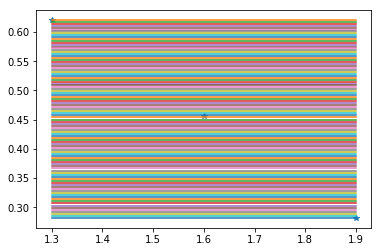

In [161]:
ax = plt.axes()

ax.plot(x_list,y_list,'*')
ax.plot(valx,yval) 
plt.show()